Day8



In [2]:


# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load Student Performance dataset
df = pd.read_csv("/content/Student_Performance.csv")  # change name if needed

# Inspect dataset shape
print("Dataset Shape:", df.shape)

# Display column names
print("\nColumn Names:")
print(df.columns)

# Display data types
print("\nData Types:")
print(df.dtypes)

# Display first and last rows
print("\nFirst 5 Rows:\n", df.head())
print("\nLast 5 Rows:\n", df.tail())

# Identify features and target variable
X = df.drop("math score", axis=1)
y = df["math score"]

print("\nFeatures (X):", X.columns)
print("Target (y): math score")


Dataset Shape: (10000, 6)

Column Names:
Index(['Hours Studied', 'Previous Scores', 'Extracurricular Activities',
       'Sleep Hours', 'Sample Question Papers Practiced', 'Performance Index'],
      dtype='object')

Data Types:
Hours Studied                         int64
Previous Scores                       int64
Extracurricular Activities           object
Sleep Hours                         float64
Sample Question Papers Practiced      int64
Performance Index                     int64
dtype: object

First 5 Rows:
    Hours Studied  Previous Scores Extracurricular Activities  Sleep Hours  \
0              7               99                        Yes          NaN   
1              4               82                         No          4.0   
2              8               51                        Yes          7.0   
3              5               52                        Yes          5.0   
4              7               75                         No          NaN   

   Sample Ques

KeyError: "['math score'] not found in axis"

Day9


In [2]:

# Check missing values
print("\nMissing Values:\n", df.isnull().sum())

# Replace invalid zero values with NaN (if any numerical zero is invalid)
num_cols = df.select_dtypes(include="number").columns
df[num_cols] = df[num_cols].replace(0, np.nan)

# Fill missing values using median
for col in num_cols:
    df[col].fillna(df[col].median(), inplace=True)

# Verify cleaned data
print("\nMissing values after cleaning:\n", df.isnull().sum())

# Check duplicate rows
print("\nDuplicates before removal:", df.duplicated().sum())

# Remove duplicate rows
df.drop_duplicates(inplace=True)

# Confirm duplicates removed
print("Duplicates after removal:", df.duplicated().sum())



Missing Values:
 Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         2
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

Missing values after cleaning:
 Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

Duplicates before removal: 148
Duplicates after removal: 0


/tmp/ipython-input-2205418832.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)


In [5]:
print(df.columns.tolist())


['Hours Studied', 'Previous Scores', 'Extracurricular Activities', 'Sleep Hours', 'Sample Question Papers Practiced', 'Performance Index']


day 10


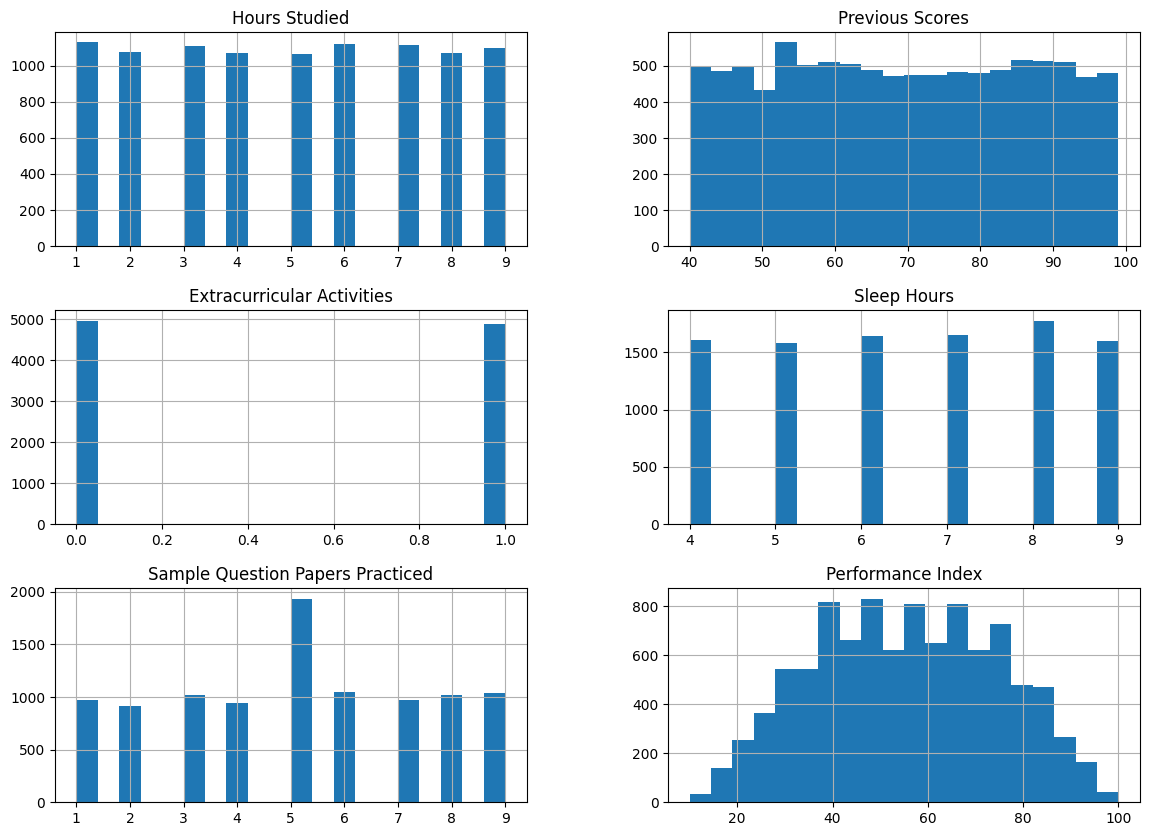


Skewness:
 Hours Studied                      -0.002502
Previous Scores                     0.004532
Extracurricular Activities          0.018680
Sleep Hours                        -0.039835
Sample Question Papers Practiced   -0.024076
Performance Index                  -0.001397
dtype: float64


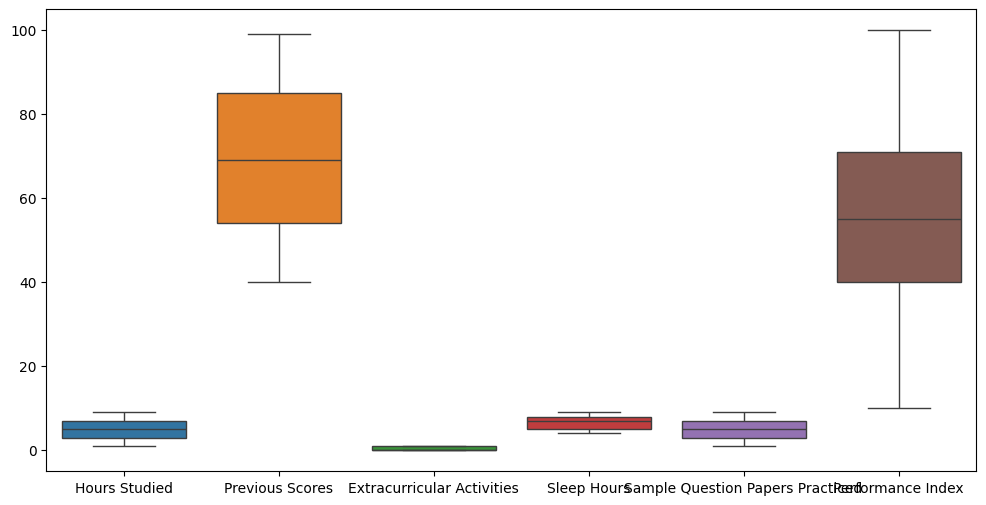

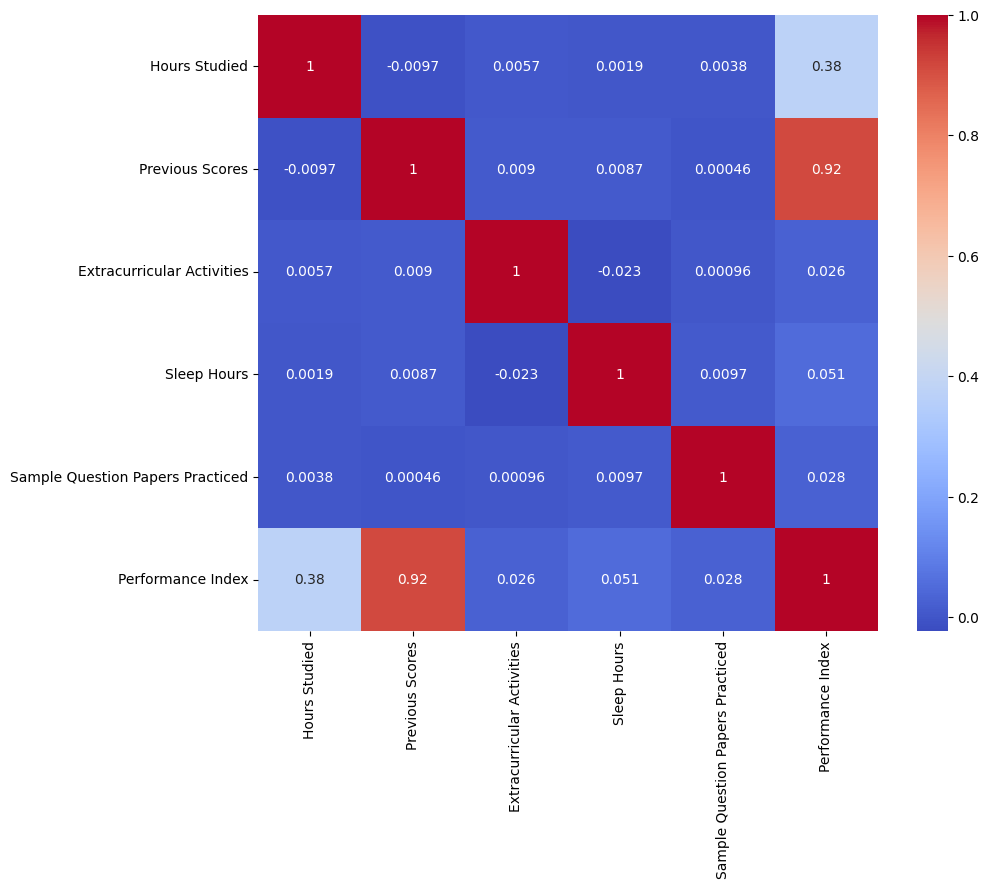

In [6]:

# Univariate analysis, correlation, scaling and train-test split

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Data distribution
df.hist(figsize=(14, 10), bins=20)
plt.show()

# Skewness
print("\nSkewness:\n", df.skew(numeric_only=True))

# Outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=df.select_dtypes(include="number"))
plt.show()

# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.show()

# Feature and target separation (USING ORIGINAL COLUMN NAME)
X = df.drop("Performance Index", axis=1)
y = df["Performance Index"]

# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)


day 11


In [8]:

# Model training, evaluation and comparison (Regression)

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Linear Regression

lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

print("\nLinear Regression Results:")
print("MSE:", mean_squared_error(y_test, y_pred_lr))
print("R2 Score:", r2_score(y_test, y_pred_lr))


# KNN Regressor with K tuning

print("\nKNN Model Tuning:")
knn_scores = {}

for k in range(1, 11):
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred_knn = knn.predict(X_test)
    score = r2_score(y_test, y_pred_knn)
    knn_scores[k] = score
    print(f"K={k}, R2 Score={score}")

# Train KNN with best K
best_k = max(knn_scores, key=knn_scores.get)
knn = KNeighborsRegressor(n_neighbors=best_k)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)


# Decision Tree Regressor

dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

print("\nDecision Tree Results:")
print("MSE:", mean_squared_error(y_test, y_pred_dt))
print("R2 Score:", r2_score(y_test, y_pred_dt))

# Visualize Decision Tree
plt.figure(figsize=(18, 8))
plot_tree(dt, feature_names=X.columns, filled=True)
plt.show()


# Model Comparison

model_scores = {
    "Linear Regression": r2_score(y_test, y_pred_lr),
    "KNN": r2_score(y_test, y_pred_knn),
    "Decision Tree": r2_score(y_test, y_pred_dt)
}

print("\nModel Comparison (R2 Scores):")
for model, score in model_scores.items():
    print(model, ":", score)

print("\nBest Model:", max(model_scores, key=model_scores.get))


# Conclusion

print("""
Conclusion:
Student performance prediction was performed using multiple regression models.
The best model was selected based on R2 score.
Feature scaling and proper data preparation improved overall performance.
""")



Linear Regression Results:
MSE: 4.174129069089613
R2 Score: 0.9885683738330501

KNN Model Tuning:
K=1, R2 Score=0.9506508629119604
K=2, R2 Score=0.9662225332031359
K=3, R2 Score=0.9714374832408155
K=4, R2 Score=0.9741328145726916
K=5, R2 Score=0.9755878783816809
K=6, R2 Score=0.976552660156387
K=7, R2 Score=0.9767226064765313
K=8, R2 Score=0.9769038924237697
K=9, R2 Score=0.9767530040709542
K=10, R2 Score=0.9767569816155617

Decision Tree Results:
MSE: 9.165919724899938
R2 Score: 0.9748974298501553


KeyboardInterrupt: 